In [1]:
import pandas as pd

from transformers import AutoModel, AutoTokenizer, AutoModelForSequenceClassification

pretrained = "../models/finetuned_model"
tokenizer = AutoTokenizer.from_pretrained(pretrained)
model = AutoModelForSequenceClassification.from_pretrained(pretrained, num_labels=2).to(
    "cuda:0"
)
# model = AutoModel.from_pretrained(pretrained).to("cuda:0")


train = pd.read_csv("../data/dataset/train.csv")
test = pd.read_csv("../data/dataset/test.csv")
validation = pd.read_csv("../data/dataset/validation.csv")

from transformers import pipeline

classifier = pipeline(
    "text-classification",
    model=pretrained,
    tokenizer=tokenizer,
    device=0,
)


pred = classifier(validation.text.tolist())


Xformers is not installed correctly. If you want to use memorry_efficient_attention to accelerate training use the following command to install Xformers
pip install xformers.


In [2]:
y_true = validation.label.tolist()
y_pred = []

for i in pred:
    y_pred.append(int(i["label"][-1]))

print(f"{len(y_true)} : pred {len(y_pred)}")


6000 : pred 6000


In [3]:
pred


[{'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.5078177452087402},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.5078177452087402},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.5078177452087402},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score': 0.507817804813385},
 {'label': 'LABEL_0', 'score

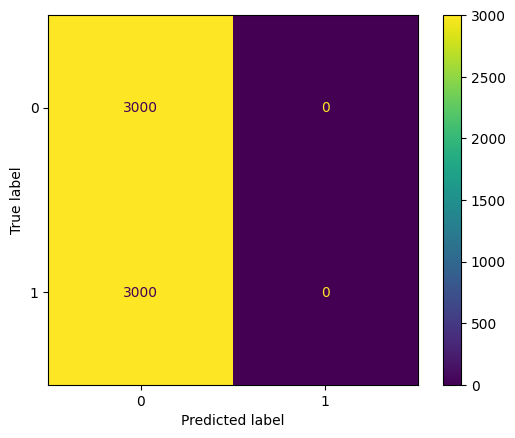

Accuracy: 0.5
Precision: 0.25
Recall: 0.5
F1 score: 0.3333333333333333


c:\Users\Neilc\dev\proj\nlp-thesis-xlnet-tagalog\.venv\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [4]:
import matplotlib.pyplot as plt
from sklearn.metrics import (
    accuracy_score,
    precision_score,
    recall_score,
    f1_score,
    confusion_matrix,
    ConfusionMatrixDisplay,
)

# Compute the confusion matrix
cm = confusion_matrix(y_true, y_pred, labels=[0, 1])
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
disp.plot()
plt.show()

# Compute the accuracy
acc = accuracy_score(y_true, y_pred)
print("Accuracy:", acc)

# Compute the precision
prec = precision_score(y_true, y_pred, average="macro")
print("Precision:", prec)

# Compute the recall
rec = recall_score(y_true, y_pred, average="macro")
print("Recall:", rec)

# Compute the f1 score
f1 = f1_score(y_true, y_pred, average="macro")
print("F1 score:", f1)

# # Compute the log-loss
# ll = log_loss(y_true, y_pred, labels=[0, 1, 2, 3, 4])
# print("Log-loss:", ll)

# # Compute the AUC-ROC
# auc = roc_auc_score(y_true, y_pred, average="macro", multi_class="ovr")
# print("AUC-ROC:", auc)


In [5]:
# Compute the confusion matrix
cm2 = confusion_matrix(y_true, y_pred2, labels=[0, 1, 2, 3, 4])
disp2 = ConfusionMatrixDisplay(confusion_matrix=cm2, display_labels=[0, 1, 2, 3, 4])
disp2.plot()
plt.show()

# Compute the accuracy
acc2 = accuracy_score(y_true, y_pred2)
print("Accuracy:", acc2)

# Compute the precision
prec2 = precision_score(y_true, y_pred2, average="macro")
print("Precision:", prec2)

# Compute the recall
rec2 = recall_score(y_true, y_pred2, average="macro")
print("Recall:", rec2)

# Compute the f1 score
f12 = f1_score(y_true, y_pred2, average="macro")
print("F1 score:", f12)

# # Compute the log-loss
# ll = log_loss(y_true, y_pred2, labels=[0, 1, 2, 3, 4])
# print("Log-loss:", ll)

# # Compute the AUC-ROC
# auc = roc_auc_score(y_true, y_pred2, average="macro", multi_class="ovr")
# print("AUC-ROC:", auc)


NameError: name 'y_pred2' is not defined